### Zadanie 4

Wykonaj następujące polecenia za pomocą biblioteki seaborn, pandas oraz scikit-learn.

Kolor czcionki (biały/czarny) w zależności od koloru tła

Import bibliotek NumPy, pandas, seaborn

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns

Import pliku font_color_dataset.csv oraz wyświetl kilka pierwszych wierszy

In [26]:
df_font_color = pd.read_csv('font_color_dataset.csv')
df_font_color.head()

,bg_red,bg_green,bg_blue,font_color
0,102,179,92,black
1,14,106,71,white
2,188,20,102,white
3,121,210,214,black
4,74,202,87,black


In [27]:
######################################################################################

Wyświetl podstawowe informacje o kolumnach

In [28]:
df_font_color.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bg_red      100 non-null    int64 
 1   bg_green    100 non-null    int64 
 2   bg_blue     100 non-null    int64 
 3   font_color  100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [29]:
######################################################################################

Wyświetl podstawowe statystyki danych

In [30]:
df_font_color.describe()

,bg_red,bg_green,bg_blue
count,100.000000,100.000000,100.000000
mean,127.840000,138.060000,130.070000
std,70.952498,78.237249,80.392001
min,2.000000,0.000000,1.000000
25%,70.000000,63.500000,58.750000
50%,129.000000,155.000000,125.000000
75%,188.250000,206.000000,206.750000
max,253.000000,255.000000,254.000000


In [31]:
######################################################################################

Wyświetl podstawowe statystyki dla typu object

In [32]:
df_font_color.describe(include='object')

,font_color
count,100
unique,2
top,black
freq,55


In [33]:
######################################################################################

Wyświetl wykres pairplot dla danych 

C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nadachow\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

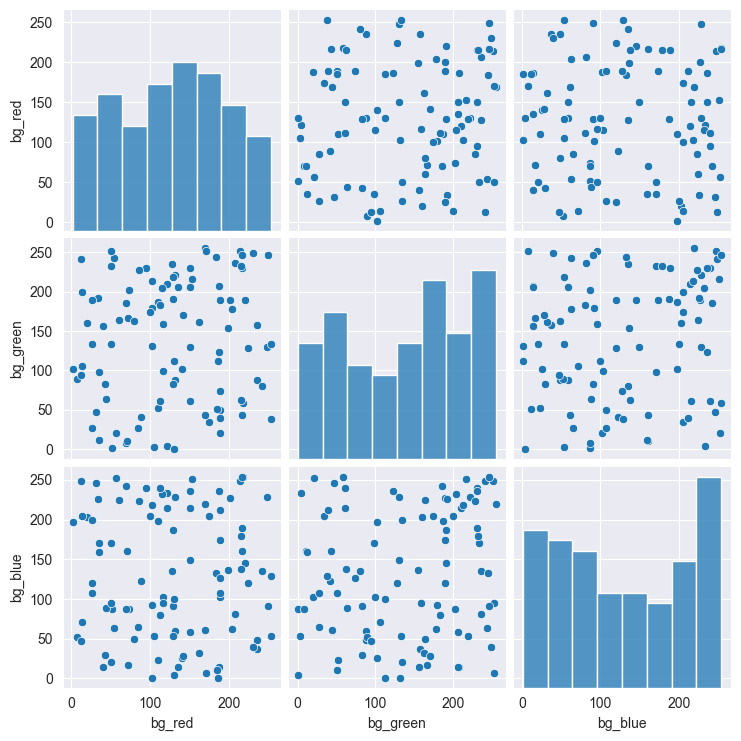

In [34]:
sns.pairplot(df_font_color)

In [35]:
######################################################################################

Zamień kolumnę kategoryczną font_color na kolumnę binarną 0/1

In [36]:
df_font_color = pd.get_dummies(df_font_color, dtype='float', drop_first=True)

In [37]:
######################################################################################

Wyświetl kilka pierwszych kolumn po przekształceniu

In [38]:
df_font_color.head()

,bg_red,bg_green,bg_blue,font_color_white
0,102,179,92,0.0
1,14,106,71,1.0
2,188,20,102,1.0
3,121,210,214,0.0
4,74,202,87,0.0


In [39]:
######################################################################################

Wyświetl mapę ciepła wzajemnych zależności pomiędzy kolumnami

<Axes: >

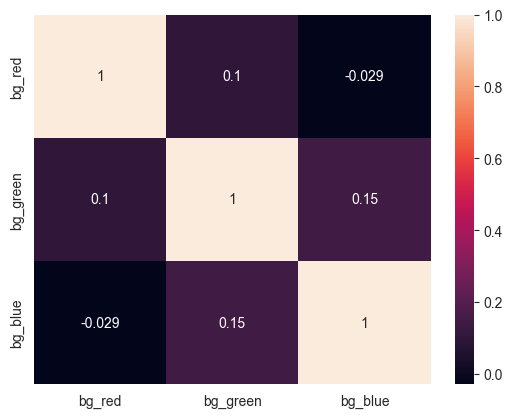

In [40]:

sns.heatmap(df_font_color.drop('font_color_white', axis=1).corr(), annot=True)

In [41]:
######################################################################################

Podziel dane na zbiory cechy i cel

In [42]:
data = df_font_color

In [43]:
target = data.pop('font_color_white')

Wyświetl kilka pierwszych wierszy cech

In [44]:
data.head()

,bg_red,bg_green,bg_blue
0,102,179,92
1,14,106,71
2,188,20,102
3,121,210,214
4,74,202,87


In [45]:
######################################################################################

Wyświetl kilka pierwszych wierszy celu

In [46]:
target.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: font_color_white, dtype: float64

In [47]:
######################################################################################

Podziel dane na zbiór treningowy i testowy (wykorzystaj flagę random_state=5 ,aby uzyskać identyczne wyniki)

In [48]:
from sklearn.model_selection import train_test_split

#X -> cechy, y -> etykiety
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=5)

Zaimportuj klasę regresji liniowej z biblioteki scikit-learn, dokonaj treningu modelu na podstawie zbioru treningowego

In [49]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
log_regression

LogisticRegression()

Dokonaj predykcji danych na zbiorze testowym, wyświetl zbiór wynikowy 

In [50]:
y_pred = log_regression.predict(X_test)
y_pred

array([0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1.])

In [51]:
######################################################################################

Oblicz macierzy pomyłek 

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0],
       [ 0, 15]], dtype=int64)

In [53]:
######################################################################################

Wyświetl mapę ciepła dla macierzy pomyłek

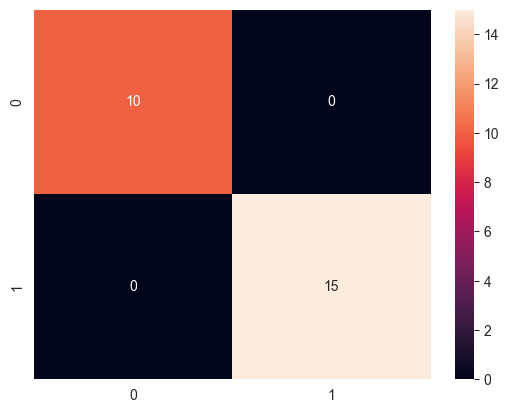

In [57]:
_ = sns.heatmap(cm, annot=True, fmt='d')

In [54]:
######################################################################################

Oblicz dokładność modelu na zbiorze treningowym

In [58]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc

1.0

In [55]:
######################################################################################

Wyświetl raport klasyfikacji dla modelu

In [59]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [56]:
######################################################################################